In [1]:
ls

 D 드라이브의 볼륨: 로컬 디스크
 볼륨 일련 번호: 46E7-B8C7

 D:\mj\big\AE 디렉터리

2020-09-20  오후 09:48    <DIR>          .
2020-09-20  오후 09:48    <DIR>          ..
2020-09-20  오후 08:42    <DIR>          .ipynb_checkpoints
2020-09-20  오후 09:31             2,874 AE.py
2020-09-20  오후 08:41           770,556 Rec_user_item_matrix2.xlsx
2020-09-20  오후 09:48           573,332 Rec_user_item_matrix3.xlsx
2020-09-20  오후 08:00             1,381 Untitled.ipynb
2020-09-20  오후 09:25           257,001 Untitled0.ipynb
               5개 파일           1,605,144 바이트
               3개 디렉터리  433,572,618,240 바이트 남음


In [40]:
import pandas as pd
import numpy as np
data = pd.read_excel("Rec_user_item_matrix2.xlsx")

In [41]:
#X = data.reset_index().drop('user', axis = 1).rename(columns = {'index' : 'user'})

In [42]:
data

,user,0,1,2,3,4,5,6,7,8,...,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363
0,1-0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,1-1,0.000000,0.0,0.0,0.0,4.382027,3.562466,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,1-10,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,1-11,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,1-12,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,6.807382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,9-23,3.433987,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
238,9-6,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.068904,0.0
239,9-7,0.000000,0.0,0.0,0.0,0.000000,0.000000,4.248495,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
240,9-8,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [43]:
X = data.iloc[:,1:]

In [104]:
import tensorflow as tf
from tensorflow.keras import layers, losses
import numpy as np

#(82x1133)
#57

class AutoEncoder(tf.keras.Model):
    def __init__(self, X_size, latent_dim):
        super(AutoEncoder, self).__init__()
        self.latent_dim = latent_dim
        self.X_size = X_size
        self.encoder = tf.keras.Sequential([
            layers.Dense(512, activation = 'selu',kernel_initializer='he_normal'),
            layers.Dense(512, activation = 'selu',kernel_initializer='he_normal'),
            layers.BatchNormalization(),
            layers.Dropout(0.2),
            layers.Dense(256, activation = 'selu', kernel_initializer='he_normal'),
            layers.Dense(256, activation = 'selu',kernel_initializer='he_normal'),
            layers.BatchNormalization(),
            layers.Dropout(0.2),
            layers.Dense(128, activation = 'selu', kernel_initializer='he_normal'),
            layers.Dense(128, activation = 'selu',kernel_initializer='he_normal'),
            layers.BatchNormalization(),
            layers.Dropout(0.2),
            layers.Dense(latent_dim, activation = 'selu')
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(128, activation = 'selu', kernel_initializer='he_normal'),
            layers.Dense(128, activation = 'selu',kernel_initializer='he_normal'),
            layers.BatchNormalization(),
            layers.Dropout(0.2),
            layers.Dense(256, activation = 'selu', kernel_initializer='he_normal'),
            layers.Dense(256, activation = 'selu',kernel_initializer='he_normal'),
            layers.BatchNormalization(),
            layers.Dropout(0.2),
            layers.Dense(512, activation = 'selu',kernel_initializer='he_normal'),
            layers.Dense(512, activation = 'selu',kernel_initializer='he_normal'),
            layers.BatchNormalization(),
            layers.Dropout(0.2),
            layers.Dense(X_size,activation = 'sigmoid')
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [105]:
from sklearn.model_selection import train_test_split
x_train, x_test, _, _ = train_test_split(np.asarray(X),np.asarray(X),test_size=0.1,shuffle=False,random_state=1004)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [106]:

#

In [118]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

reduceLR = ReduceLROnPlateau( 
    monitor='loss',  # 모니터 기준 설정 val_loss? val_acc?
    factor=0.5,          # callback 호출시 학습률을 1/2로 줄인다
    patience=150,         # epoch 10 동안 개선되지 않으면 callback이 호출
)
earlystopping = EarlyStopping(monitor='loss',  # 모니터 기준 설정 (val_loss) 
                              patience=500,         # 15회 Epoch동안 개선되지 않는다면 종료
                             )

In [119]:
from keras import backend as K


def losses(r_b, y_b):
    z = np.array(list(map(lambda x : 1 if x != 0 else 0, r_b)))
    mmse = 0 

    mmse += z*((r_b-y_b)**2)
    return mmse
    

# 손실함수 정의
def my_loss(y_true, y_pred):
  # 내가 정의한 손실 함수
  z = tf.constant(list(map(lambda x : 1 if x != 0 else 0, y_true)))
  loss = K.mean(z*(y_true - y_pred)**2)
  return loss

In [120]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

In [121]:
tf.__version__

'2.3.0'

In [122]:
def masked_mse(y_true, y_pred):
    # masked function
    mask_true = K.cast(K.not_equal(y_true, 0), K.floatx())
    # masked squared error
    masked_squared_error = K.square(mask_true * (y_true - y_pred))
    masked_mse = K.sum(masked_squared_error, axis=-1) / K.maximum(K.sum(mask_true, axis=-1), 1)
    return masked_mse

def masked_rmse(y_true, y_pred):
        # masked function
        mask_true = K.cast(K.not_equal(y_true, 0), K.floatx())
        # masked squared error
        masked_squared_error = K.square(mask_true * (y_true - y_pred))
        masked_mse = K.sqrt(K.sum(masked_squared_error, axis=-1) / K.maximum(K.sum(mask_true, axis=-1), 1))
        return masked_mse

def masked_rmse_clip(y_true, y_pred):
    # masked function
    mask_true = K.cast(K.not_equal(y_true, 0), K.floatx())
    y_pred = K.clip(y_pred, 1, 10)
    # masked squared error
    masked_squared_error = K.square(mask_true * (y_true - y_pred))
    masked_mse = K.sqrt(K.sum(masked_squared_error, axis=-1) / K.maximum(K.sum(mask_true, axis=-1), 1))
    return masked_mse

In [123]:
autoencoder = AutoEncoder(x_train.shape[1], 64)
autoencoder.compile(optimizer='adam', loss=masked_rmse, metrics=[masked_rmse_clip]) 

autoencoder.fit(x_train, x_train,
                epochs=10000,
                batch_size = 32,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks = [reduceLR,earlystopping])

Epoch 1/10000
7/7 [==============================] - 0s 47ms/step - loss: 4.7536 - masked_rmse_clip: 4.2906 - val_loss: 4.6682 - val_masked_rmse_clip: 4.2209
Epoch 2/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.6617 - masked_rmse_clip: 4.2906 - val_loss: 4.6095 - val_masked_rmse_clip: 4.2209
Epoch 3/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.5608 - masked_rmse_clip: 4.2906 - val_loss: 4.5564 - val_masked_rmse_clip: 4.2209
Epoch 4/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.4780 - masked_rmse_clip: 4.2906 - val_loss: 4.5297 - val_masked_rmse_clip: 4.2209
Epoch 5/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.4167 - masked_rmse_clip: 4.2906 - val_loss: 4.4886 - val_masked_rmse_clip: 4.2209
Epoch 6/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.3802 - masked_rmse_clip: 4.2906 - val_loss: 4.4600 - val_masked_rmse_clip: 4.2209
Epoch 7/10000
7/7 [==============================] -

7/7 [==============================] - 0s 11ms/step - loss: 4.2935 - masked_rmse_clip: 4.2906 - val_loss: 4.3755 - val_masked_rmse_clip: 4.2209
Epoch 53/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2930 - masked_rmse_clip: 4.2906 - val_loss: 4.3772 - val_masked_rmse_clip: 4.2209
Epoch 54/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2926 - masked_rmse_clip: 4.2906 - val_loss: 4.3765 - val_masked_rmse_clip: 4.2209
Epoch 55/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2936 - masked_rmse_clip: 4.2906 - val_loss: 4.3735 - val_masked_rmse_clip: 4.2209
Epoch 56/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2926 - masked_rmse_clip: 4.2906 - val_loss: 4.3717 - val_masked_rmse_clip: 4.2209
Epoch 57/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2927 - masked_rmse_clip: 4.2906 - val_loss: 4.3692 - val_masked_rmse_clip: 4.2209
Epoch 58/10000
7/7 [==============================] - 0s 10ms/

7/7 [==============================] - 0s 9ms/step - loss: 4.2913 - masked_rmse_clip: 4.2906 - val_loss: 4.3515 - val_masked_rmse_clip: 4.2209
Epoch 104/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2914 - masked_rmse_clip: 4.2906 - val_loss: 4.3514 - val_masked_rmse_clip: 4.2209
Epoch 105/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2913 - masked_rmse_clip: 4.2906 - val_loss: 4.3513 - val_masked_rmse_clip: 4.2209
Epoch 106/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2911 - masked_rmse_clip: 4.2906 - val_loss: 4.3521 - val_masked_rmse_clip: 4.2209
Epoch 107/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2913 - masked_rmse_clip: 4.2906 - val_loss: 4.3537 - val_masked_rmse_clip: 4.2209
Epoch 108/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2913 - masked_rmse_clip: 4.2906 - val_loss: 4.3525 - val_masked_rmse_clip: 4.2209
Epoch 109/10000
7/7 [==============================] - 0s 

7/7 [==============================] - 0s 11ms/step - loss: 4.2917 - masked_rmse_clip: 4.2906 - val_loss: 4.3380 - val_masked_rmse_clip: 4.2209
Epoch 155/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2911 - masked_rmse_clip: 4.2906 - val_loss: 4.3392 - val_masked_rmse_clip: 4.2209
Epoch 156/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2911 - masked_rmse_clip: 4.2906 - val_loss: 4.3410 - val_masked_rmse_clip: 4.2209
Epoch 157/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2917 - masked_rmse_clip: 4.2906 - val_loss: 4.3479 - val_masked_rmse_clip: 4.2209
Epoch 158/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2911 - masked_rmse_clip: 4.2906 - val_loss: 4.3500 - val_masked_rmse_clip: 4.2209
Epoch 159/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2911 - masked_rmse_clip: 4.2906 - val_loss: 4.3497 - val_masked_rmse_clip: 4.2209
Epoch 160/10000
7/7 [==============================] - 0

7/7 [==============================] - 0s 11ms/step - loss: 4.2920 - masked_rmse_clip: 4.2906 - val_loss: 4.3593 - val_masked_rmse_clip: 4.2209
Epoch 206/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2918 - masked_rmse_clip: 4.2906 - val_loss: 4.3638 - val_masked_rmse_clip: 4.2209
Epoch 207/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2913 - masked_rmse_clip: 4.2906 - val_loss: 4.3567 - val_masked_rmse_clip: 4.2209
Epoch 208/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2911 - masked_rmse_clip: 4.2906 - val_loss: 4.3529 - val_masked_rmse_clip: 4.2209
Epoch 209/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2917 - masked_rmse_clip: 4.2906 - val_loss: 4.3528 - val_masked_rmse_clip: 4.2209
Epoch 210/10000
7/7 [==============================] - 0s 12ms/step - loss: 4.2918 - masked_rmse_clip: 4.2906 - val_loss: 4.3569 - val_masked_rmse_clip: 4.2209
Epoch 211/10000
7/7 [==============================] - 0

7/7 [==============================] - 0s 11ms/step - loss: 4.2909 - masked_rmse_clip: 4.2906 - val_loss: 4.3489 - val_masked_rmse_clip: 4.2209
Epoch 257/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2912 - masked_rmse_clip: 4.2906 - val_loss: 4.3456 - val_masked_rmse_clip: 4.2209
Epoch 258/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2908 - masked_rmse_clip: 4.2906 - val_loss: 4.3462 - val_masked_rmse_clip: 4.2209
Epoch 259/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2922 - masked_rmse_clip: 4.2906 - val_loss: 4.3664 - val_masked_rmse_clip: 4.2209
Epoch 260/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2943 - masked_rmse_clip: 4.2906 - val_loss: 4.3620 - val_masked_rmse_clip: 4.2209
Epoch 261/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2945 - masked_rmse_clip: 4.2906 - val_loss: 4.3569 - val_masked_rmse_clip: 4.2209
Epoch 262/10000
7/7 [==============================] - 0

7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3348 - val_masked_rmse_clip: 4.2209
Epoch 308/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3348 - val_masked_rmse_clip: 4.2209
Epoch 309/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3344 - val_masked_rmse_clip: 4.2209
Epoch 310/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3342 - val_masked_rmse_clip: 4.2209
Epoch 311/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3341 - val_masked_rmse_clip: 4.2209
Epoch 312/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3346 - val_masked_rmse_clip: 4.2209
Epoch 313/10000
7/7 [==============================] - 0s

7/7 [==============================] - 0s 11ms/step - loss: 4.2908 - masked_rmse_clip: 4.2906 - val_loss: 4.3463 - val_masked_rmse_clip: 4.2209
Epoch 359/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2908 - masked_rmse_clip: 4.2906 - val_loss: 4.3437 - val_masked_rmse_clip: 4.2209
Epoch 360/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3426 - val_masked_rmse_clip: 4.2209
Epoch 361/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2908 - masked_rmse_clip: 4.2906 - val_loss: 4.3421 - val_masked_rmse_clip: 4.2209
Epoch 362/10000
7/7 [==============================] - 0s 12ms/step - loss: 4.2908 - masked_rmse_clip: 4.2906 - val_loss: 4.3424 - val_masked_rmse_clip: 4.2209
Epoch 363/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2908 - masked_rmse_clip: 4.2906 - val_loss: 4.3420 - val_masked_rmse_clip: 4.2209
Epoch 364/10000
7/7 [==============================] - 0

7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3313 - val_masked_rmse_clip: 4.2209
Epoch 410/10000
7/7 [==============================] - 0s 12ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3310 - val_masked_rmse_clip: 4.2209
Epoch 411/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3309 - val_masked_rmse_clip: 4.2209
Epoch 412/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3308 - val_masked_rmse_clip: 4.2209
Epoch 413/10000
7/7 [==============================] - 0s 12ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3308 - val_masked_rmse_clip: 4.2209
Epoch 414/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3308 - val_masked_rmse_clip: 4.2209
Epoch 415/10000
7/7 [==============================] - 0

7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3351 - val_masked_rmse_clip: 4.2209
Epoch 461/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3349 - val_masked_rmse_clip: 4.2209
Epoch 462/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3346 - val_masked_rmse_clip: 4.2209
Epoch 463/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3345 - val_masked_rmse_clip: 4.2209
Epoch 464/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3345 - val_masked_rmse_clip: 4.2209
Epoch 465/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3344 - val_masked_rmse_clip: 4.2209
Epoch 466/10000
7/7 [==============================] - 0

7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3339 - val_masked_rmse_clip: 4.2209
Epoch 512/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3339 - val_masked_rmse_clip: 4.2209
Epoch 513/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3338 - val_masked_rmse_clip: 4.2209
Epoch 514/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3338 - val_masked_rmse_clip: 4.2209
Epoch 515/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3339 - val_masked_rmse_clip: 4.2209
Epoch 516/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3338 - val_masked_rmse_clip: 4.2209
Epoch 517/10000
7/7 [==============================] - 0s

7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3327 - val_masked_rmse_clip: 4.2209
Epoch 563/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3328 - val_masked_rmse_clip: 4.2209
Epoch 564/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3327 - val_masked_rmse_clip: 4.2209
Epoch 565/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3327 - val_masked_rmse_clip: 4.2209
Epoch 566/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3328 - val_masked_rmse_clip: 4.2209
Epoch 567/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3328 - val_masked_rmse_clip: 4.2209
Epoch 568/10000
7/7 [==============================] - 0

7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3330 - val_masked_rmse_clip: 4.2209
Epoch 614/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3330 - val_masked_rmse_clip: 4.2209
Epoch 615/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3330 - val_masked_rmse_clip: 4.2209
Epoch 616/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3330 - val_masked_rmse_clip: 4.2209
Epoch 617/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3331 - val_masked_rmse_clip: 4.2209
Epoch 618/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3332 - val_masked_rmse_clip: 4.2209
Epoch 619/10000
7/7 [==============================] - 0s

7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3320 - val_masked_rmse_clip: 4.2209
Epoch 665/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3321 - val_masked_rmse_clip: 4.2209
Epoch 666/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3321 - val_masked_rmse_clip: 4.2209
Epoch 667/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3322 - val_masked_rmse_clip: 4.2209
Epoch 668/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3322 - val_masked_rmse_clip: 4.2209
Epoch 669/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3323 - val_masked_rmse_clip: 4.2209
Epoch 670/10000
7/7 [==============================] - 0

7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3296 - val_masked_rmse_clip: 4.2209
Epoch 716/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3296 - val_masked_rmse_clip: 4.2209
Epoch 717/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3296 - val_masked_rmse_clip: 4.2209
Epoch 718/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3297 - val_masked_rmse_clip: 4.2209
Epoch 719/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3299 - val_masked_rmse_clip: 4.2209
Epoch 720/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3300 - val_masked_rmse_clip: 4.2209
Epoch 721/10000
7/7 [==============================] - 0s 

7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3299 - val_masked_rmse_clip: 4.2209
Epoch 767/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3299 - val_masked_rmse_clip: 4.2209
Epoch 768/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3298 - val_masked_rmse_clip: 4.2209
Epoch 769/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3298 - val_masked_rmse_clip: 4.2209
Epoch 770/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3298 - val_masked_rmse_clip: 4.2209
Epoch 771/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3297 - val_masked_rmse_clip: 4.2209
Epoch 772/10000
7/7 [==============================] - 0

7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3295 - val_masked_rmse_clip: 4.2209
Epoch 818/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3296 - val_masked_rmse_clip: 4.2209
Epoch 819/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3297 - val_masked_rmse_clip: 4.2209
Epoch 820/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3296 - val_masked_rmse_clip: 4.2209
Epoch 821/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3296 - val_masked_rmse_clip: 4.2209
Epoch 822/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3295 - val_masked_rmse_clip: 4.2209
Epoch 823/10000
7/7 [==============================] - 0

7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3293 - val_masked_rmse_clip: 4.2209
Epoch 869/10000
7/7 [==============================] - 0s 12ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3293 - val_masked_rmse_clip: 4.2209
Epoch 870/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3293 - val_masked_rmse_clip: 4.2209
Epoch 871/10000
7/7 [==============================] - 0s 15ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3293 - val_masked_rmse_clip: 4.2209
Epoch 872/10000
7/7 [==============================] - 0s 12ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3293 - val_masked_rmse_clip: 4.2209
Epoch 873/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3293 - val_masked_rmse_clip: 4.2209
Epoch 874/10000
7/7 [==============================] - 0

7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3294 - val_masked_rmse_clip: 4.2209
Epoch 920/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3295 - val_masked_rmse_clip: 4.2209
Epoch 921/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3296 - val_masked_rmse_clip: 4.2209
Epoch 922/10000
7/7 [==============================] - 0s 7ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3297 - val_masked_rmse_clip: 4.2209
Epoch 923/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3298 - val_masked_rmse_clip: 4.2209
Epoch 924/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3298 - val_masked_rmse_clip: 4.2209
Epoch 925/10000
7/7 [==============================] - 0s 8ms/

7/7 [==============================] - 0s 8ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3347 - val_masked_rmse_clip: 4.2209
Epoch 971/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3347 - val_masked_rmse_clip: 4.2209
Epoch 972/10000
7/7 [==============================] - 0s 7ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3346 - val_masked_rmse_clip: 4.2209
Epoch 973/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3345 - val_masked_rmse_clip: 4.2209
Epoch 974/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3344 - val_masked_rmse_clip: 4.2209
Epoch 975/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3343 - val_masked_rmse_clip: 4.2209
Epoch 976/10000
7/7 [==============================] - 0s 10

7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3328 - val_masked_rmse_clip: 4.2209
Epoch 1022/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3327 - val_masked_rmse_clip: 4.2209
Epoch 1023/10000
7/7 [==============================] - 0s 7ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3328 - val_masked_rmse_clip: 4.2209
Epoch 1024/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3327 - val_masked_rmse_clip: 4.2209
Epoch 1025/10000
7/7 [==============================] - 0s 7ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3328 - val_masked_rmse_clip: 4.2209
Epoch 1026/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3329 - val_masked_rmse_clip: 4.2209
Epoch 1027/10000
7/7 [==============================] - 0

7/7 [==============================] - 0s 8ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3283 - val_masked_rmse_clip: 4.2209
Epoch 1073/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3283 - val_masked_rmse_clip: 4.2209
Epoch 1074/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3283 - val_masked_rmse_clip: 4.2209
Epoch 1075/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3283 - val_masked_rmse_clip: 4.2209
Epoch 1076/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3282 - val_masked_rmse_clip: 4.2209
Epoch 1077/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3282 - val_masked_rmse_clip: 4.2209
Epoch 1078/10000
7/7 [==============================] 

7/7 [==============================] - 0s 9ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3286 - val_masked_rmse_clip: 4.2209
Epoch 1124/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3286 - val_masked_rmse_clip: 4.2209
Epoch 1125/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3286 - val_masked_rmse_clip: 4.2209
Epoch 1126/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3286 - val_masked_rmse_clip: 4.2209
Epoch 1127/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3286 - val_masked_rmse_clip: 4.2209
Epoch 1128/10000
7/7 [==============================] - 0s 7ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3286 - val_masked_rmse_clip: 4.2209
Epoch 1129/10000
7/7 [==============================] - 0

Epoch 1174/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3285 - val_masked_rmse_clip: 4.2209
Epoch 1175/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3285 - val_masked_rmse_clip: 4.2209
Epoch 1176/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3285 - val_masked_rmse_clip: 4.2209
Epoch 1177/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3286 - val_masked_rmse_clip: 4.2209
Epoch 1178/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3285 - val_masked_rmse_clip: 4.2209
Epoch 1179/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3285 - val_masked_rmse_clip: 4.2209
Epoch 1180/10000
7/7 [==================

7/7 [==============================] - 0s 8ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1226/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3276 - val_masked_rmse_clip: 4.2209
Epoch 1227/10000
7/7 [==============================] - 0s 7ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3276 - val_masked_rmse_clip: 4.2209
Epoch 1228/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3276 - val_masked_rmse_clip: 4.2209
Epoch 1229/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3277 - val_masked_rmse_clip: 4.2209
Epoch 1230/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3277 - val_masked_rmse_clip: 4.2209
Epoch 1231/10000
7/7 [==============================] - 0

7/7 [==============================] - 0s 10ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3279 - val_masked_rmse_clip: 4.2209
Epoch 1277/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3279 - val_masked_rmse_clip: 4.2209
Epoch 1278/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3279 - val_masked_rmse_clip: 4.2209
Epoch 1279/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3279 - val_masked_rmse_clip: 4.2209
Epoch 1280/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3279 - val_masked_rmse_clip: 4.2209
Epoch 1281/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3280 - val_masked_rmse_clip: 4.2209
Epoch 1282/10000
7/7 [==============================] -

7/7 [==============================] - 0s 8ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3280 - val_masked_rmse_clip: 4.2209
Epoch 1328/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3281 - val_masked_rmse_clip: 4.2209
Epoch 1329/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3281 - val_masked_rmse_clip: 4.2209
Epoch 1330/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2908 - masked_rmse_clip: 4.2906 - val_loss: 4.3277 - val_masked_rmse_clip: 4.2209
Epoch 1331/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3276 - val_masked_rmse_clip: 4.2209
Epoch 1332/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3276 - val_masked_rmse_clip: 4.2209
Epoch 1333/10000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3276 - val_masked_rmse_clip: 4.2209
Epoch 1379/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3276 - val_masked_rmse_clip: 4.2209
Epoch 1380/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3276 - val_masked_rmse_clip: 4.2209
Epoch 1381/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3276 - val_masked_rmse_clip: 4.2209
Epoch 1382/10000
7/7 [==============================] - 0s 7ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3276 - val_masked_rmse_clip: 4.2209
Epoch 1383/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3276 - val_masked_rmse_clip: 4.2209
Epoch 1384/10000
7/7 [==============================] - 0

7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3276 - val_masked_rmse_clip: 4.2209
Epoch 1430/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3277 - val_masked_rmse_clip: 4.2209
Epoch 1431/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3276 - val_masked_rmse_clip: 4.2209
Epoch 1432/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3276 - val_masked_rmse_clip: 4.2209
Epoch 1433/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3277 - val_masked_rmse_clip: 4.2209
Epoch 1434/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3276 - val_masked_rmse_clip: 4.2209
Epoch 1435/10000
7/7 [==============================] -

7/7 [==============================] - 0s 9ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3279 - val_masked_rmse_clip: 4.2209
Epoch 1481/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3280 - val_masked_rmse_clip: 4.2209
Epoch 1482/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3279 - val_masked_rmse_clip: 4.2209
Epoch 1483/10000
7/7 [==============================] - 0s 7ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3279 - val_masked_rmse_clip: 4.2209
Epoch 1484/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1485/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1486/10000
7/7 [==============================] - 0

7/7 [==============================] - 0s 7ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1532/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1533/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1534/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3277 - val_masked_rmse_clip: 4.2209
Epoch 1535/10000
7/7 [==============================] - 0s 7ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3277 - val_masked_rmse_clip: 4.2209
Epoch 1536/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3277 - val_masked_rmse_clip: 4.2209
Epoch 1537/10000
7/7 [==============================] - 0

7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1583/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1584/10000
7/7 [==============================] - 0s 7ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1585/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1586/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1587/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3277 - val_masked_rmse_clip: 4.2209
Epoch 1588/10000
7/7 [==============================] - 

7/7 [==============================] - 0s 9ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1634/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1635/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1636/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3277 - val_masked_rmse_clip: 4.2209
Epoch 1637/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3277 - val_masked_rmse_clip: 4.2209
Epoch 1638/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1639/10000
7/7 [==============================] - 0

7/7 [==============================] - 0s 10ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1685/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1686/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1687/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1688/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1689/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1690/10000
7/7 [==============================] - 

7/7 [==============================] - 0s 10ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1736/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1737/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1738/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3277 - val_masked_rmse_clip: 4.2209
Epoch 1739/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3277 - val_masked_rmse_clip: 4.2209
Epoch 1740/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1741/10000
7/7 [==============================] 

7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1787/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1788/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3279 - val_masked_rmse_clip: 4.2209
Epoch 1789/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3280 - val_masked_rmse_clip: 4.2209
Epoch 1790/10000
7/7 [==============================] - 0s 11ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3279 - val_masked_rmse_clip: 4.2209
Epoch 1791/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3279 - val_masked_rmse_clip: 4.2209
Epoch 1792/10000
7/7 [==============================] -

7/7 [==============================] - 0s 8ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1838/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1839/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3278 - val_masked_rmse_clip: 4.2209
Epoch 1840/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3279 - val_masked_rmse_clip: 4.2209
Epoch 1841/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3279 - val_masked_rmse_clip: 4.2209
Epoch 1842/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3280 - val_masked_rmse_clip: 4.2209
Epoch 1843/10000
7/7 [==============================] - 

7/7 [==============================] - 0s 8ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3279 - val_masked_rmse_clip: 4.2209
Epoch 1889/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3279 - val_masked_rmse_clip: 4.2209
Epoch 1890/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3279 - val_masked_rmse_clip: 4.2209
Epoch 1891/10000
7/7 [==============================] - 0s 9ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3279 - val_masked_rmse_clip: 4.2209
Epoch 1892/10000
7/7 [==============================] - 0s 8ms/step - loss: 4.2907 - masked_rmse_clip: 4.2906 - val_loss: 4.3279 - val_masked_rmse_clip: 4.2209
Epoch 1893/10000
7/7 [==============================] - 0s 10ms/step - loss: 4.2906 - masked_rmse_clip: 4.2906 - val_loss: 4.3279 - val_masked_rmse_clip: 4.2209
Epoch 1894/10000
7/7 [==============================] - 

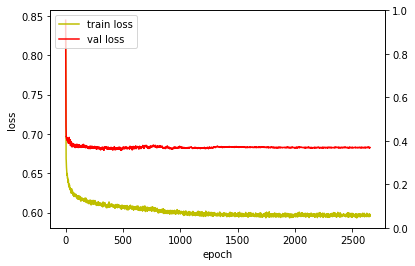

In [129]:

import matplotlib.pyplot as plt
%matplotlib inline

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')


loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper left')


plt.show()

In [130]:
encoded_num = autoencoder.encoder(np.asarray(X)).numpy()
decoded_num = autoencoder.decoder(encoded_num).numpy()

In [131]:
X

,0,1,2,3,4,5,6,7,8,9,...,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363
0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.0,0.0,0.0,4.382027,3.562466,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,6.807382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,3.433987,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
238,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.068904,0.0
239,0.000000,0.0,0.0,0.0,0.000000,0.000000,4.248495,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
240,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [132]:
X_en = pd.DataFrame(decoded_num)

In [133]:
X_en

,0,1,2,3,4,5,6,7,8,9,...,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132
0,0.999978,0.999977,0.397540,5.787738e-03,1.000000,1.000000,0.750415,0.562498,0.999997,0.169304,...,0.985661,0.806604,0.999996,4.959749e-06,0.000303,0.000189,4.776340e-07,0.765646,0.994926,0.998921
1,0.999997,0.999996,0.826334,6.546900e-02,1.000000,1.000000,0.894912,0.938338,1.000000,0.618027,...,0.401617,0.920595,0.999964,7.946620e-07,0.000091,0.000053,5.832182e-08,0.058383,0.998112,0.999716
2,0.955173,0.020071,0.000349,1.113117e-06,0.999980,0.999967,0.729822,0.000205,0.069181,0.000390,...,1.000000,0.159881,0.999999,9.437017e-01,0.728210,0.671029,9.606702e-01,1.000000,0.944278,0.385650
3,0.975955,0.010160,0.000425,1.898709e-06,0.999983,0.999956,0.846250,0.000172,0.047646,0.000435,...,1.000000,0.314499,0.999999,9.749405e-01,0.703591,0.751146,9.841264e-01,1.000000,0.984915,0.539848
4,0.567867,0.681560,0.000203,2.136999e-07,0.999986,0.999996,0.038052,0.000816,0.646680,0.000247,...,1.000000,0.003198,0.999998,5.195642e-02,0.562482,0.093708,6.196851e-02,0.999999,0.013334,0.052148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,1.000000,0.884678,0.976824,9.999990e-01,0.227001,0.139614,0.999945,0.923812,0.505426,0.987394,...,0.008102,0.999999,0.044598,9.999861e-01,0.927213,0.903946,9.999034e-01,0.010198,0.999981,0.994738
238,0.999969,0.999387,0.999830,9.999993e-01,0.986000,0.992797,0.986078,0.999486,0.997082,0.999699,...,0.001659,0.998360,0.193665,8.090986e-01,0.366387,0.323405,8.109425e-01,0.003052,0.998662,0.974586
239,0.999983,0.002315,0.990650,9.999982e-01,0.574975,0.061346,0.998544,0.005714,0.157725,0.259249,...,0.731976,1.000000,0.992044,9.999961e-01,0.011466,0.995828,9.999540e-01,0.095975,1.000000,0.999987
240,0.999995,0.068775,0.995410,9.999992e-01,0.995817,0.936042,0.995939,0.013992,0.611076,0.600187,...,0.895079,0.999998,0.999613,9.999009e-01,0.008692,0.954517,9.994294e-01,0.172807,0.999999,0.999989


In [134]:
encoded_num.shape

(242, 64)

In [135]:
decoded_num.shape

(242, 1133)

-------------------------------------------------------------------------------------------------

In [115]:
x_test[1]*(x_test[1]-x_test[0])

array([50.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)

In [228]:

a = tf.constant([[0, 1], [2, 4]], dtype=tf.float32)
b = tf.constant([[1, 1], [1, 2]], dtype=tf.float32)

In [229]:
(a-b)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-1.,  0.],
       [ 1.,  2.]], dtype=float32)>

In [230]:
a*(a-b)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.,  0.],
       [ 2.,  8.]], dtype=float32)>

In [244]:
tf.constant(list(map(lambda x : 1 if x != 0 else 0, np.array([1,2,3,10,0,0,]))))

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([1, 1, 1, 1, 0, 0], dtype=int32)>